**this is a template notebook. To get a 60 you will need to complete the first three chapters. From there is additional points. In the template you'll see text between <> so \<example> where you will have to isert your own text. 
    The template is also just an indication. You can add more cells if needed, and can of course delete this line**

# <span style ='background:yellow'>Something Fishy
## DMS - Regression Assignment (v1.2)
Author: Tamara van der Gragt<br>
Student number: 534235<br>
Date: 20/03/2023

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* \<add other packages\>

From these we will need the following libraries:

In [2]:
#enter here all those 'from .... import ....'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


# 1. The Data
We are going to use the datafile Fish.csv. This contains data from fish markets, download from https://www.kaggle.com/datasets/aungpyaeap/fish-market?resource=download.

In [3]:
#enter the code to load the data
data = pd.read_csv("../Fish.csv")
data.columns = ["Species","Weight","VerticalLength","DiagonalLength","CrossLength","Height","Width"]

Here's a quick look at the data:

In [4]:
#enter the code to see the first few rows of the data
data.head()

,Species,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


<span style='background:yellow'><explain the variables (/fields/columns) you are going to use for your prediction. The dependent y (the one you are going to predict) and **two** x's (the ones you are going to use to predict that y). What do these variables mean?></span>

## Y variable
- we want to predict the weight of the fish, all weights are in grams


all measurements are in centimeters
## X variables
- Vertical length measured of the fish
- DiagonalLength of the fish
- Width of the fish
- Height of the fish

*note:* You can score a +.5 point if you don't just pick randomly your variables, but use either a pairplot (a plot showing all scatterplots between all possible pairs of variables), a heatmap, and/or a correlation matrix, to pick some that at least have a reasonable correlation.

# 2. The Bivariate Regression

## 2.1. The First Bivariate Regression

First we are going to look at the predictions using only one of our two x's. 

We start with predicting Weight of the fish using Vertical Length of the fish. Below a visualisation of these two:

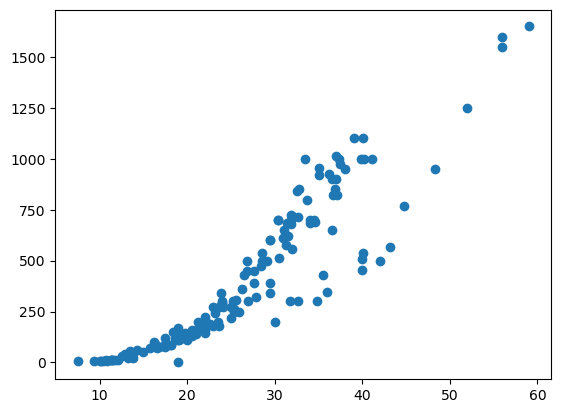

In [5]:
#enter code to show scatterplot
plt.scatter(x=data["VerticalLength"],y=data["Weight"])

As can be seen from the scatterplot there seems to be a there is a clear relationship between the weight and the vertical length of a fish.

Now that we have a visual inspection its time to perform a bivariate regression (twice, once for each x variable). 

We first split the data into training and testing data. We start again with the x of Vertical Lenght of the fish:

In [6]:
#add code to create training and testing data
x = data["VerticalLength"].to_numpy().reshape((-1,1))
y = data["Weight"].to_numpy().reshape((-1,1))
z = data["Width"].to_numpy().reshape((-1,1))

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.4, random_state=101)

Now setup the linear regression model and fit our training data:

In [7]:
#add code to create linear regression model

model = LinearRegression().fit(X_train,Y_train)

Lets see how well the model performed with the training data, by visualisation:

<Axes: >

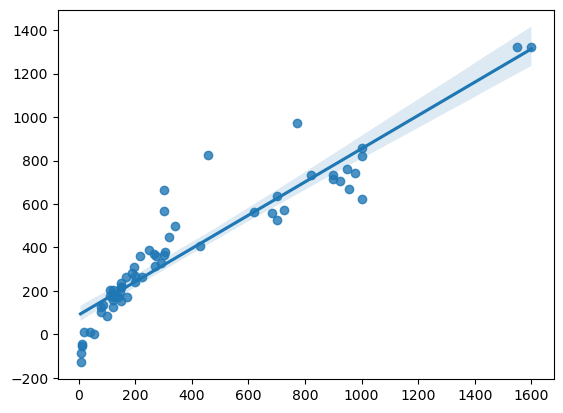

In [8]:
#add code to show scatterplot with the regression line
predictions = model.predict(X_test)
sns.regplot(x=Y_test,y=predictions)

it looks like a ok distrubution with some out lyiers

Besides from a visual, we can also use some metrics.

In [9]:
#code to show the results of the statsmodels.api summary
model.score(X_test,Y_test)

print(sm.OLS(Y_test,sm.add_constant(predictions)).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     410.4
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           4.94e-29
Time:                        22:04:29   Log-Likelihood:                -405.72
No. Observations:                  64   AIC:                             815.4
Df Residuals:                      62   BIC:                             819.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -50.6915     27.752     -1.827      0.0

0.85+ R-squared means that the regression model can explain the observation for that much of the data set.
<span style='background:yellow'>\\<explain in your own words what the R-squared means and indicates, and the two numbers in the column of coef></span>

We can also check how well our model worked by using the testing data:

C:\Users\Tammie\AppData\Local\Temp\ipykernel_10984\3102354719.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test-predictions),bins=50)


<Axes: ylabel='Density'>

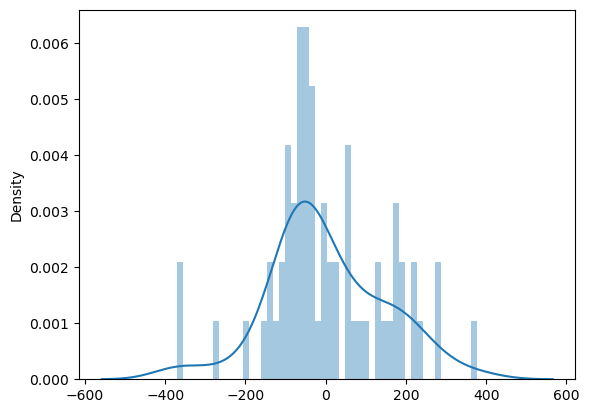

In [10]:
#code to show how well the model performmed
sns.distplot((Y_test-predictions),bins=50)

That the model is working as intended i guess.

Now we repeat all these steps, but using the other x-variable: Width of the fish

## 2.2. The Second Bivariate Regression

In this section we are going to repeat all the steps from the previous one, but now we are going to try to predict Weight of the fish. based on Width of the fish

Below a visualisation of these two:

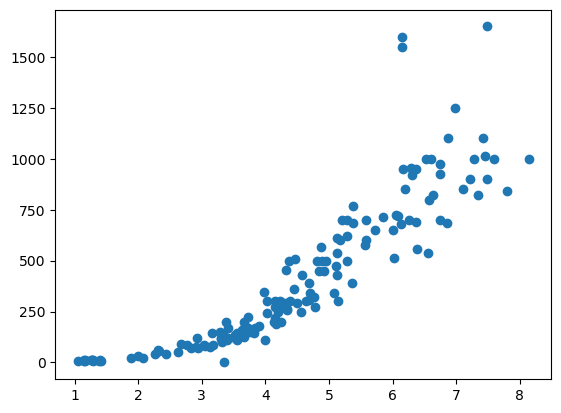

In [11]:
#enter code to show scatterplot
plt.scatter(x=data["Width"],y=data["Weight"])

As can be seen from the scatterplot there seems to be a Clear relationship between the two

Creating again the training/testing sets and the model itself:

In [12]:
#add code here to split the data and the model itself:
Z_train, Z_test, Y_train, Y_test = train_test_split(z,y,test_size=0.4, random_state=101)

Now lets see how this performs:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     179.8
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           5.50e-20
Time:                        22:04:30   Log-Likelihood:                -427.15
No. Observations:                  64   AIC:                             858.3
Df Residuals:                      62   BIC:                             862.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -54.6720     40.957     -1.335      0.1

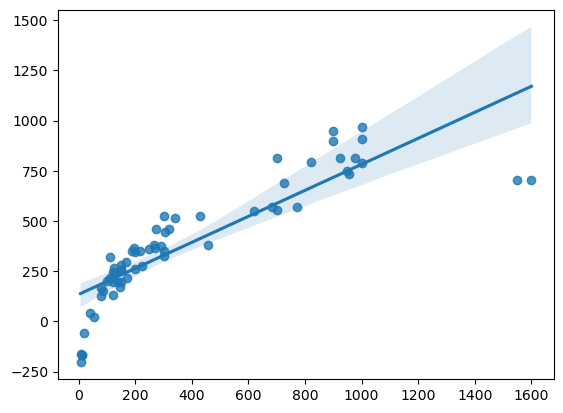

In [13]:
#add code to show both the scatterplot with the regression line, and the model summary results.
model = LinearRegression().fit(Z_train,Y_train)
predictions = model.predict(Z_test)

sns.regplot(y=predictions,x=Y_test)

print(sm.OLS(Y_test,sm.add_constant(predictions)).fit().summary())

As seen there is a relationship between the Width of the fish and the weight of the fish, and when you compare the plots they have a simularity to them

# 3. Multivariate Regression Analysis

In the previous chapter two separate bivariate regression analyses were performed to predict Weight based on Vertical length and Width of the fish separately. In this chapter we are going to look if we can make an even better prediction if we try to predict Weight of the fish based on BOTH of these together.

We begin with combining the two x's into one X:

In [14]:
#add code here to add the two x's into one
X = data[['Width','VerticalLength']]
Y = data["Weight"]

To actually perform the regression now, we can use the exact same method as before with the bivariate one:

In [15]:
#code to split the data, and create & fit the model:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4, random_state=101)


A visualisation becomes now more difficult, since it would have to be in 3D. (0.5 bonus if you manage to do this). However, the model summary still works:

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     232.8
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           2.82e-29
Time:                        22:04:31   Log-Likelihood:                -401.73
No. Observations:                  64   AIC:                             809.5
Df Residuals:                      61   BIC:                             815.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -572.6000     48.642    -11.

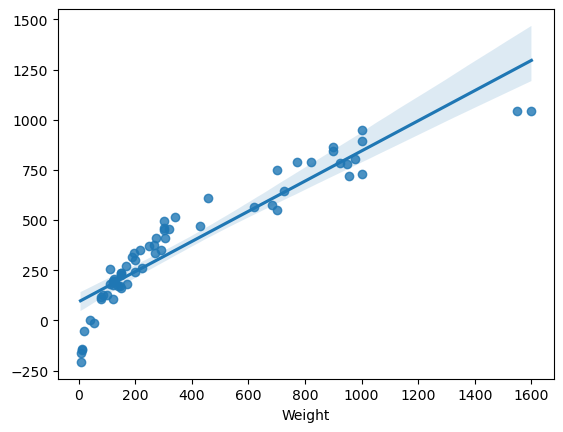

In [16]:
#code to show model summary and how well the model performmed
model = LinearRegression().fit(X_train,Y_train)
predictions = model.predict(X_test)
sns.regplot(y=predictions,x=Y_test)

model.score(X_test,Y_test)

print(sm.OLS(Y_test,sm.add_constant(X_test)).fit().summary())

Instead of looking at the R-square, we should be looking at the adjusted R-square. <span style='background:yellow'>< explain why></span>.

We also see more rows now in the 'coef' column. <span style='background:yellow'>\<explain why this is></span>.

Not explained in presentation so not implemented

Beter because it uses more data points to determine the desired outcome 

A last thing to do would be to check the VIF's:

In [17]:
#add code here to see the VIF's
[variance_inflation_factor(X_test, j) for j in range(X_test.shape[1])]

[28.143405540358852, 28.143405540358852]

a VIF is a variance inflation factor, is the ratio (quotient) of the variance of estimating some parameter in a model that includes multiple other terms (parameters) by the variance of a model constructed using only one term
Whats a VIF?

<font size="5"><center>-----Chapters 1 to 3 are required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However the template is not as extensive as the previous chapters. <br>
    You can select any chapter below the order is not fixed (you can leave the others empty)<br>
    You don't have to use the same dataset for the chapters below. If it helps in clarification you can use another dataset, but then make sure to include it as you submit.
    ----</center></font>

# 4. Selecting Input Variables

In chapter 3 we improved on the model to predict <span style='background:yellow'>\<your y-variable name></span> by using two input variables. We can actually add as many input variables as we like. Lets explore this by simply first adding ALL other variables as X.

In [18]:
#add code to create an X variable using all variables, except of course your y variable:


We could first have a quick look at the results of this model:

In [19]:
#add code here to model and fit the new X with the y, and show the model summary and how well the model performmed:


However we have to be careful with those VIF's. So lets see:

In [20]:
#add code here to show the VIF's.

We need to remove the ones with a VIF higher than 10, but each time we remove one, the VIF's change. Lets create a small Python function that removes the highest VIF each time, until none of them are anymore above 10.

In [21]:
#add your function code here.


Lets run the function, and then use the result to create a new model:

In [22]:
#add code here that runs the just made function, and uses the result for the new model:


We might also keep an eye out on that adjusted R-square. Iterate over all possible combinations of input variables we have remaining, and see which combination yields the highest adjusted R-square.

In [23]:
#add your code here.


Finally lets see how this new model performs:

In [24]:
#add code here to model and fit the new X with the y, and show the model summary and how well the model performmed:


<span style='background:yellow'>\<interpret the result, how well is the model now compared to our previous models?></span>

# 5. Another splitting method

To obtain the the test and training data we used the so-called hold-out method. However other methods also exist for this. In this chapter an explanation **and practical example** is given for the \<your splitting method>.

<span style='background:yellow'>\<explain THOROUGHLY the method. How does it work in principal, how is it different from the hold-out method?. You will need more cells than the ones below!></span>

In [25]:
#code using your method


<span style='background:yellow'>\<explain the result></span>

# 6. A New Technique

So far, we only used the 'basic' simple linear regression (the bivariate) and multiple linear regression. However, there are many variations, as also seen on the slides. In this chapter the \<your regression method> is explained.

<span style='background:yellow'>\<explain THOROUGHLY the method. How does it work, what makes it different from the regular linear regression, in which situations might this be optimal. You will need more cells than the ones below></span>

In [26]:
#code using your method


# 7. Surprise

There is a lot written about regression analysis, and although a lot was discussed during the lecture, that was just a tip of an iceberg. One thing for example that was not mentioned is \<start explaining from here....>

----this chapter is for the 10. It should be something substantial, related to regression and not already discussed----

---examples could be an explanation on the Gradient Descent approach to linear programming, or using Matrix Algebra to obtain the linear regression equation----